<a href="https://colab.research.google.com/github/SVafadar69/Assignment6_TensorFlow/blob/main/AudioClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt -y install libportaudio2
!pip install -q tflite-model-maker

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libportaudio2 is already the newest version (19.6.0-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 27 not upgraded.


In [ ]:
import tensorflow as tf
import tflite_model_maker as mm
from tflite_model_maker import audio_classifier
import os

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import itertools
import glob
import random

from IPython.display import Audio, Image
from scipy.io import wavfile

print(f"TensorFlow Version: {tf.__version__}")
print(f"Model Maker Version: {mm.__version__}")

TensorFlow Version: 2.8.3
Model Maker Version: 0.4.2


In [ ]:
birds_dataset_folder = tf.keras.utils.get_file('birds_dataset.zip',
                                                'https://storage.googleapis.com/laurencemoroney-blog.appspot.com/birds_dataset.zip',
                                                cache_dir='./',
                                                cache_subdir='dataset',
                                                extract=True)
                                                

343695360/343680986 [==============================] - 3s 0us/step


In [ ]:
# @title [Run this] Util functions and data structures.

data_dir = './dataset/small_birds_dataset'

bird_code_to_name = {
  'wbwwre1': 'White-breasted Wood-Wren',
  'houspa': 'House Sparrow',
  'redcro': 'Red Crossbill',  
  'chcant2': 'Chestnut-crowned Antpitta',
  'azaspi1': "Azara's Spinetail",   
}

birds_images = {
  'wbwwre1': 'https://upload.wikimedia.org/wikipedia/commons/thumb/2/22/Henicorhina_leucosticta_%28Cucarachero_pechiblanco%29_-_Juvenil_%2814037225664%29.jpg/640px-Henicorhina_leucosticta_%28Cucarachero_pechiblanco%29_-_Juvenil_%2814037225664%29.jpg', # 	Alejandro Bayer Tamayo from Armenia, Colombia 
  'houspa': 'https://upload.wikimedia.org/wikipedia/commons/thumb/5/52/House_Sparrow%2C_England_-_May_09.jpg/571px-House_Sparrow%2C_England_-_May_09.jpg', # 	Diliff
  'redcro': 'https://upload.wikimedia.org/wikipedia/commons/thumb/4/49/Red_Crossbills_%28Male%29.jpg/640px-Red_Crossbills_%28Male%29.jpg', #  Elaine R. Wilson, www.naturespicsonline.com
  'chcant2': 'https://upload.wikimedia.org/wikipedia/commons/thumb/6/67/Chestnut-crowned_antpitta_%2846933264335%29.jpg/640px-Chestnut-crowned_antpitta_%2846933264335%29.jpg', # 	Mike's Birds from Riverside, CA, US
  'azaspi1': 'https://upload.wikimedia.org/wikipedia/commons/thumb/b/b2/Synallaxis_azarae_76608368.jpg/640px-Synallaxis_azarae_76608368.jpg', # https://www.inaturalist.org/photos/76608368
}

test_files = os.path.abspath(os.path.join(data_dir, 'test/*/*.wav'))

def get_random_audio_file():
  test_list = glob.glob(test_files)
  random_audio_path = random.choice(test_list)
  return random_audio_path


def show_bird_data(audio_path):
  sample_rate, audio_data = wavfile.read(audio_path, 'rb')

  bird_code = audio_path.split('/')[-2]
  print(f'Bird name: {bird_code_to_name[bird_code]}')
  print(f'Bird code: {bird_code}')
  display(Image(birds_images[bird_code]))

  plttitle = f'{bird_code_to_name[bird_code]} ({bird_code})'
  plt.title(plttitle)
  plt.plot(audio_data)
  display(Audio(audio_data, rate=sample_rate))

print('functions and data structures created')

functions and data structures created


Bird name: White-breasted Wood-Wren
Bird code: wbwwre1


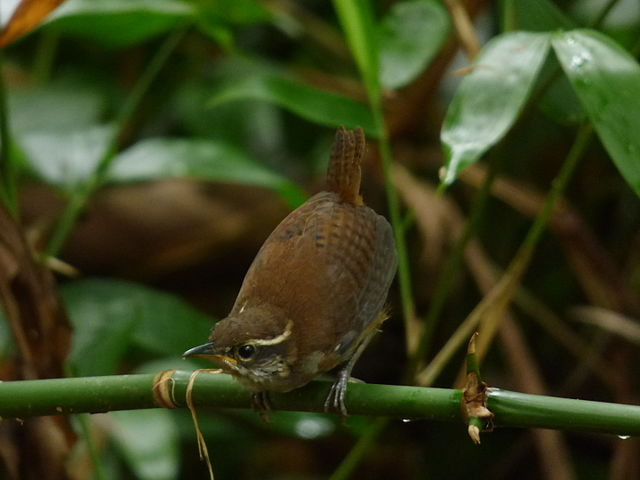

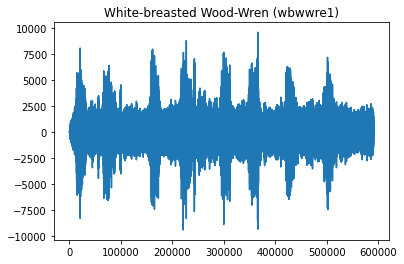

In [ ]:
random_audio = get_random_audio_file()
show_bird_data(random_audio)

In [ ]:
spec = audio_classifier.YamNetSpec(
    keep_yamnet_and_custom_heads=True,
    frame_step=3 * audio_classifier.YamNetSpec.EXPECTED_WAVEFORM_LENGTH,
    frame_length=6 * audio_classifier.YamNetSpec.EXPECTED_WAVEFORM_LENGTH)

In [ ]:
train_data = audio_classifier.DataLoader.from_folder(
    spec, os.path.join(data_dir, 'train'), cache=True)
train_data, validation_data = train_data.split(0.8)
test_data = audio_classifier.DataLoader.from_folder(
    spec, os.path.join(data_dir, 'test'), cache=True)

In [ ]:
batch_size = 128
epochs = 100

print('Training the model')
model = audio_classifier.create(
    train_data,
    spec,
    validation_data,
    batch_size=batch_size,
    epochs=epochs)

Training the model
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 classification_head (Dense)  (None, 5)                5125      
                                                                 
Total params: 5,125
Trainable params: 5,125
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
23/23 [==============================] - 294s 12s/step - loss: 1.5550 - acc: 0.3022 - val_loss: 1.2943 - val_acc: 0.5480
Epoch 2/100
23/23 [==============================] - 1s 39ms/step - loss: 1.3007 - acc: 0.5081 - val_loss: 1.1566 - val_acc: 0.6370
Epoch 3/100
23/23 [==============================] - 1s 37ms/step - loss: 1.1206 - acc: 0.6282 - val_loss: 1.0597 - val_acc: 0.6545
Epoch 4/100
23/23 [==============================] - 1s 36ms/step - loss: 1.0188 - acc: 0.6682 - val_loss: 0.9921 - val_acc: 0.6702
Epoch 5/100
23/23 [===============

In [ ]:
print('Evaluating the model')
model.evaluate(test_data)

Evaluating the model
28/28 [==============================] - 71s 2s/step - loss: 0.8855 - acc: 0.7612


[0.8855223059654236, 0.7611940503120422]

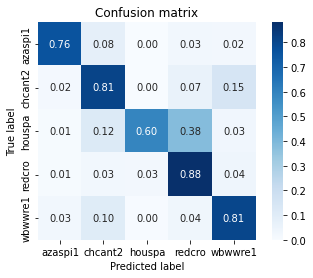

In [ ]:
def show_confusion_matrix(confusion, test_labels):
  """Compute confusion matrix and normalize."""
  confusion_normalized = confusion.astype("float") / confusion.sum(axis=1)
  axis_labels = test_labels
  ax = sns.heatmap(
      confusion_normalized, xticklabels=axis_labels, yticklabels=axis_labels,
      cmap='Blues', annot=True, fmt='.2f', square=True)
  plt.title("Confusion matrix")
  plt.ylabel("True label")
  plt.xlabel("Predicted label")

confusion_matrix = model.confusion_matrix(test_data)
show_confusion_matrix(confusion_matrix.numpy(), test_data.index_to_label)

In [ ]:
serving_model = model.create_serving_model()

print(f'Model\'s input shape and type: {serving_model.inputs}')
print(f'Model\'s output shape and type: {serving_model.outputs}')

Model's input shape and type: [<KerasTensor: shape=(None, 15600) dtype=float32 (created by layer 'audio')>]
Model's output shape and type: [<KerasTensor: shape=(None, 521) dtype=float32 (created by layer 'keras_layer')>, <KerasTensor: shape=(None, 5) dtype=float32 (created by layer 'sequential')>]


Bird name: Chestnut-crowned Antpitta
Bird code: chcant2


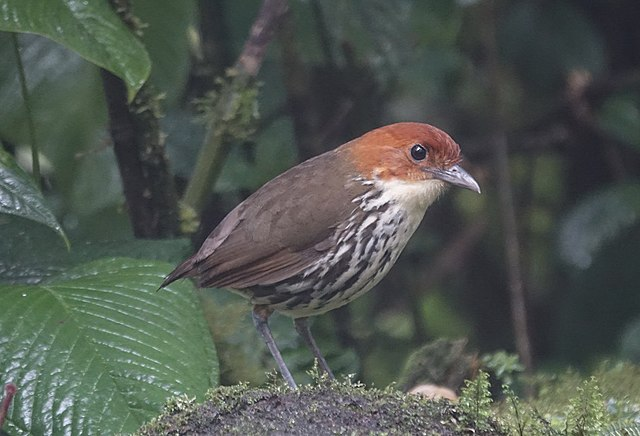

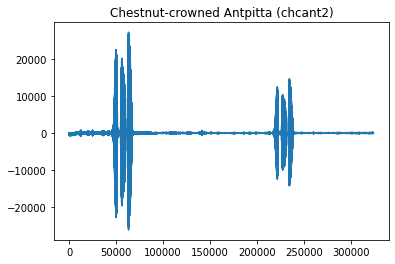

In [ ]:
# if you want to try another file just uncoment the line below
random_audio = get_random_audio_file()
show_bird_data(random_audio)

In [ ]:
sample_rate, audio_data = wavfile.read(random_audio, 'rb')

audio_data = np.array(audio_data) / tf.int16.max
input_size = serving_model.input_shape[1]

splitted_audio_data = tf.signal.frame(audio_data, input_size, input_size, pad_end=True, pad_value=0)

print(f'Test audio path: {random_audio}')
print(f'Original size of the audio data: {len(audio_data)}')
print(f'Number of windows for inference: {len(splitted_audio_data)}')

Test audio path: /content/dataset/small_birds_dataset/test/chcant2/XC609905.wav
Original size of the audio data: 324320
Number of windows for inference: 21


In [ ]:
print(random_audio)

results = []
print('Result of the window ith:  your model class -> score,  (spec class -> score)')
for i, data in enumerate(splitted_audio_data):
  yamnet_output, inference = serving_model(data)
  results.append(inference[0].numpy())
  result_index = tf.argmax(inference[0])
  spec_result_index = tf.argmax(yamnet_output[0])
  t = spec._yamnet_labels()[spec_result_index]
  result_str = f'Result of the window {i}: ' \
  f'\t{test_data.index_to_label[result_index]} -> {inference[0][result_index].numpy():.3f}, ' \
  f'\t({spec._yamnet_labels()[spec_result_index]} -> {yamnet_output[0][spec_result_index]:.3f})'
  print(result_str)


results_np = np.array(results)
mean_results = results_np.mean(axis=0)
result_index = mean_results.argmax()
print(f'Mean result: {test_data.index_to_label[result_index]} -> {mean_results[result_index]}')

/content/dataset/small_birds_dataset/test/chcant2/XC609905.wav
Result of the window ith:  your model class -> score,  (spec class -> score)
Result of the window 0: 	chcant2 -> 0.662, 	(Outside, rural or natural -> 0.339)
Result of the window 1: 	chcant2 -> 0.818, 	(Animal -> 0.405)
Result of the window 2: 	chcant2 -> 0.777, 	(Animal -> 0.457)
Result of the window 3: 	chcant2 -> 0.999, 	(Animal -> 0.957)
Result of the window 4: 	chcant2 -> 0.881, 	(Animal -> 0.566)
Result of the window 5: 	chcant2 -> 0.825, 	(Animal -> 0.316)
Result of the window 6: 	chcant2 -> 0.775, 	(Silence -> 0.388)
Result of the window 7: 	chcant2 -> 0.910, 	(Animal -> 0.469)
Result of the window 8: 	chcant2 -> 0.663, 	(Animal -> 0.285)
Result of the window 9: 	chcant2 -> 0.331, 	(Animal -> 0.873)
Result of the window 10: 	redcro -> 0.949, 	(Silence -> 0.747)
Result of the window 11: 	redcro -> 0.320, 	(Animal -> 0.361)
Result of the window 12: 	azaspi1 -> 0.912, 	(Snort -> 0.318)
Result of the window 13: 	azaspi1

In [ ]:
models_path = './birds_models'
print(f'Exporing the TFLite model to {models_path}')

model.export(models_path, tflite_filename='my_birds_model.tflite')

Exporing the TFLite model to ./birds_models


In [ ]:
model.export(models_path, export_format=[mm.ExportFormat.SAVED_MODEL, mm.ExportFormat.LABEL])